## EDA theory DA

Deepakram Bettarayan 21BDS0070 as part of Exploratory Data Analysis Theory DA

# Module 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./BEPS.csv')


In [4]:
print("Shape of dataset:", data.shape)


Shape of dataset: (1525, 11)


In [5]:
print(data.info())
print(data.describe())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   rownames                 1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Kennedy                  1525 non-null   int64 
 8   Europe                   1525 non-null   int64 
 9   political.knowledge      1525 non-null   int64 
 10  gender                   1525 non-null   object
dtypes: int64(9), object(2)
memory usage: 131.2+ KB
None
          rownames          age  economic.cond.national  \
count  1525.000000  1525.000000             1525.000000   
mean    763.000000    54.1822

About the dataset
As we see, we have 10 different variables/predictors:

vote: This is the output we want to draw. It's a Factor variables which represent the three main political parties: Conservative, Liberal Democrat and Labour.

age: The age of each person surveyed.

gender: Each person's gender (Male or Female).

economic.cond.national: This variable represents each person's knowledge of the national economy.

economic.cond.household: This variable represents each person's knowledge of families' household economy.

Blair: This variable represents each person's opinion about labourist candidate Blair.

Hague: This variable represents each person's opinion about conservative candidate Hague.

Kennedy: This variable represents each person's opinion about conservative candidate Kennedy.

Europe: This variable represents each person's euroscepticism. If a persons is very eurosceptic, the value will be 11. If is very pro-european, the value will be 0

political.knowledge: This variable represents each person's political knowledge.

In [6]:
data.head()

rownames              vote  age  economic.cond.national  \
0         1  Liberal Democrat   43                       3   
1         2            Labour   36                       4   
2         3            Labour   35                       4   
3         4            Labour   24                       4   
4         5            Labour   41                       2   

   economic.cond.household  Blair  Hague  Kennedy  Europe  \
0                        3      4      1        4       2   
1                        4      4      4        4       5   
2                        4      5      2        3       3   
3                        2      2      1        3       4   
4                        2      1      1        4       6   

   political.knowledge  gender  
0                    2  female  
1                    2    male  
2                    2    male  
3                    0  female  
4                    2    male

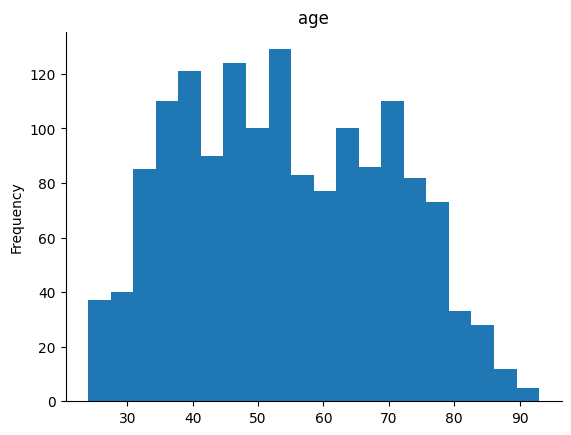

In [ ]:
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# M2
data transformation

In [7]:
data = data.drop_duplicates()
data.fillna(method='ffill', inplace=True)


<ipython-input-7-c11381224c14>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')
# Check for missing values and handle them
data['age'].fillna(data['age'].mean(), inplace=True)
# Bin the 'age' column into 3 categories
data['age_binned'] = pd.cut(data['age'], bins=3, labels=['Young', 'Middle-aged', 'Old'])
print(data[['age', 'age_binned']].head())

   age age_binned
0   43      Young
1   36      Young
2   35      Young
3   24      Young
4   41      Young


<ipython-input-8-0775d417723d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)


In [9]:
data['economic.cond.national'] = pd.to_numeric(data['economic.cond.national'], errors='coerce')
data['econ_cond_binned'] = pd.cut(data['economic.cond.national'], bins=3, labels=['Poor', 'Average', 'Good'])
print(data[['economic.cond.national', 'econ_cond_binned']].head())


   economic.cond.national econ_cond_binned
0                       3          Average
1                       4             Good
2                       4             Good
3                       4             Good
4                       2             Poor


In [10]:
data.columns

Index(['rownames', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Kennedy', 'Europe',
       'political.knowledge', 'gender', 'age_binned', 'econ_cond_binned'],
      dtype='object')

In [11]:
data.head()

rownames              vote  age  economic.cond.national  \
0         1  Liberal Democrat   43                       3   
1         2            Labour   36                       4   
2         3            Labour   35                       4   
3         4            Labour   24                       4   
4         5            Labour   41                       2   

   economic.cond.household  Blair  Hague  Kennedy  Europe  \
0                        3      4      1        4       2   
1                        4      4      4        4       5   
2                        4      5      2        3       3   
3                        2      2      1        3       4   
4                        2      1      1        4       6   

   political.knowledge  gender age_binned econ_cond_binned  
0                    2  female      Young          Average  
1                    2    male      Young             Good  
2                    2    male      Young             Good  
3                    0  female      Young             Good  
4                    2    male      Young             Poor

# module 3
variable analysis

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   rownames                 1525 non-null   int64   
 1   vote                     1525 non-null   object  
 2   age                      1525 non-null   int64   
 3   economic.cond.national   1525 non-null   int64   
 4   economic.cond.household  1525 non-null   int64   
 5   Blair                    1525 non-null   int64   
 6   Hague                    1525 non-null   int64   
 7   Kennedy                  1525 non-null   int64   
 8   Europe                   1525 non-null   int64   
 9   political.knowledge      1525 non-null   int64   
 10  gender                   1525 non-null   object  
 11  age_binned               1525 non-null   category
 12  econ_cond_binned         1525 non-null   category
dtypes: category(2), int64(9), object(2)
memory usage: 134.4+ KB


In [21]:
numerical_columns = ['age', 'economic.cond.national', 'economic.cond.household',
                     'Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
categorical_columns = ['gender', 'vote']

univariate

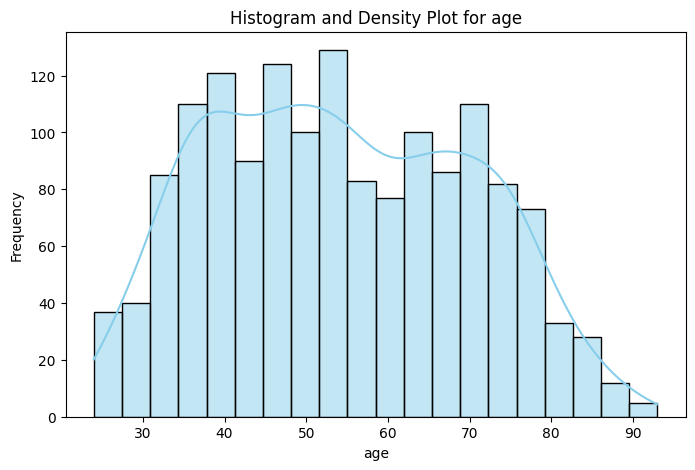

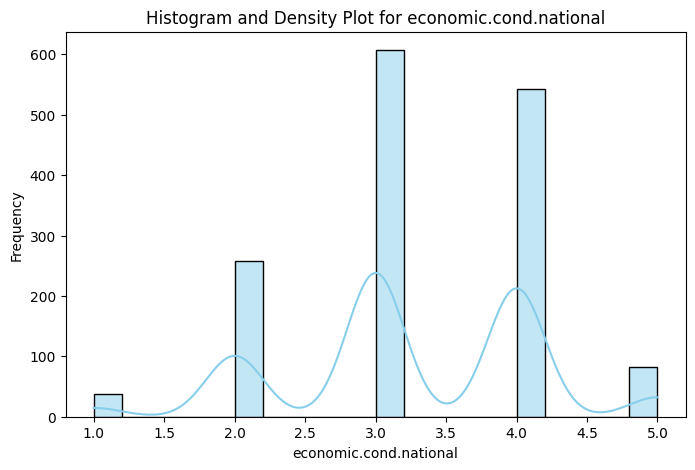

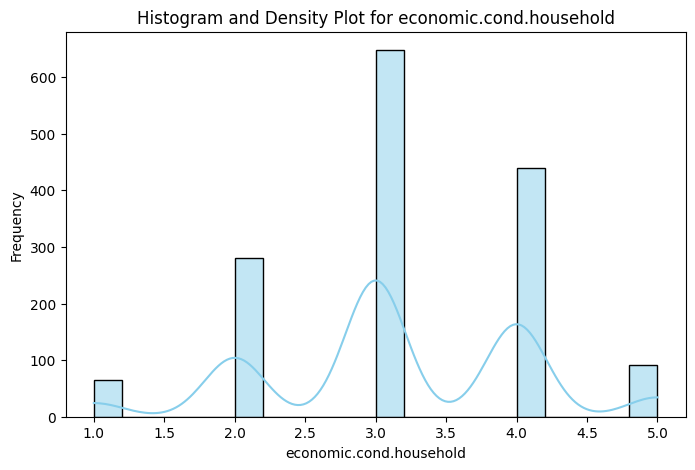

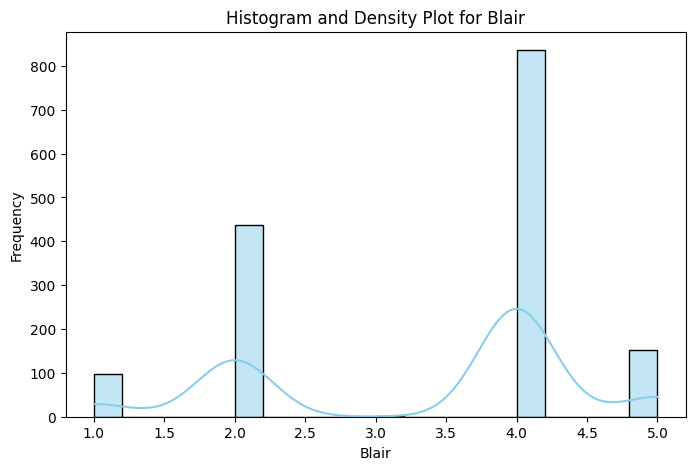

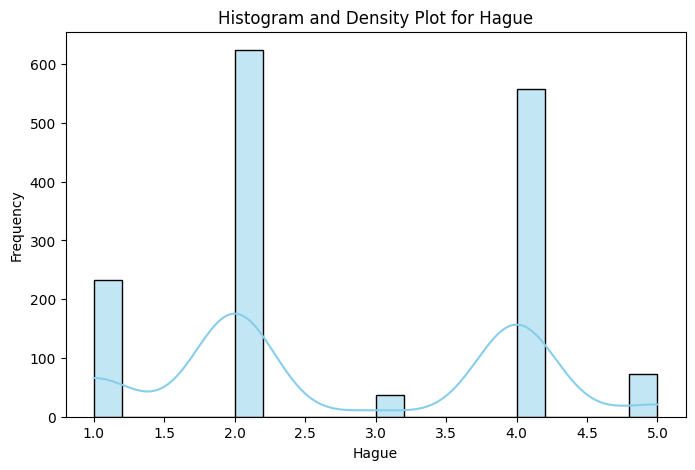

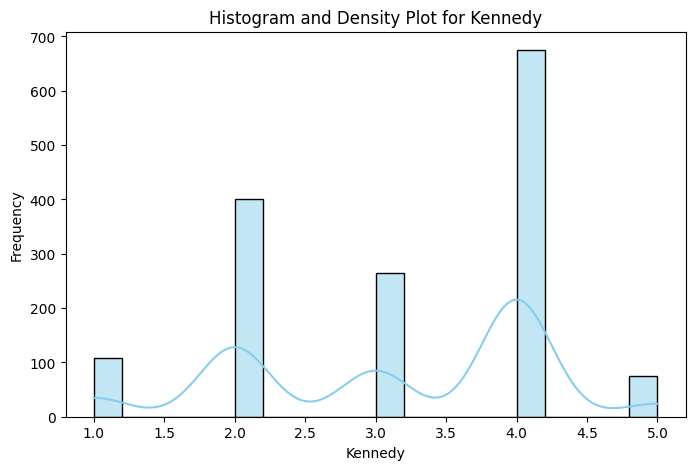

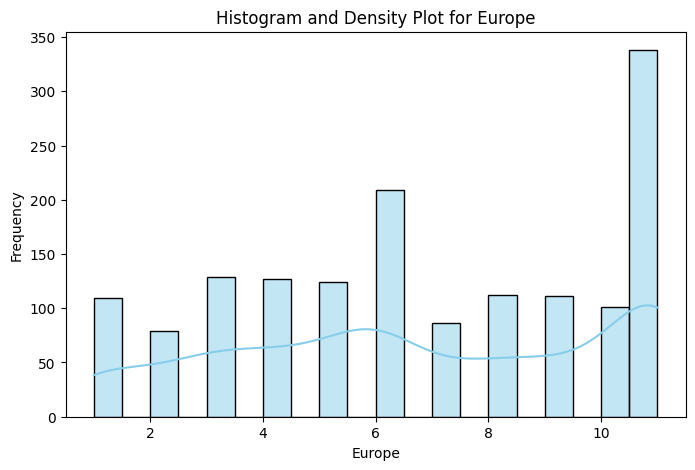

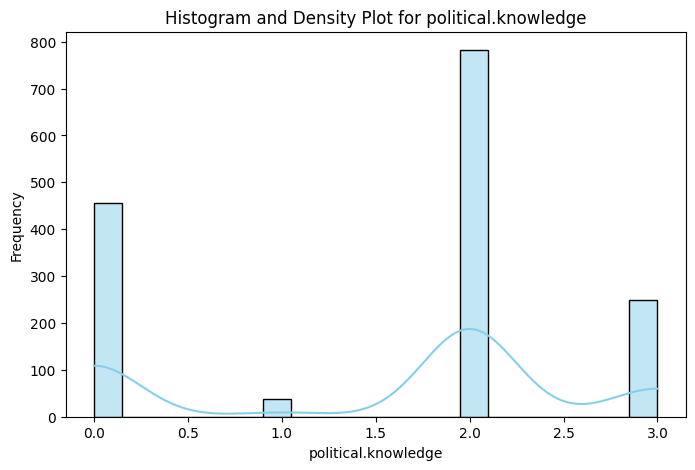

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram and Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-25-b5ecb059d3ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


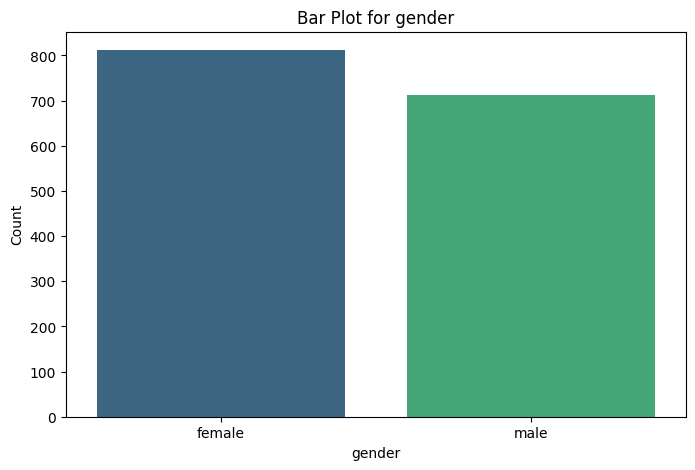

<ipython-input-25-b5ecb059d3ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


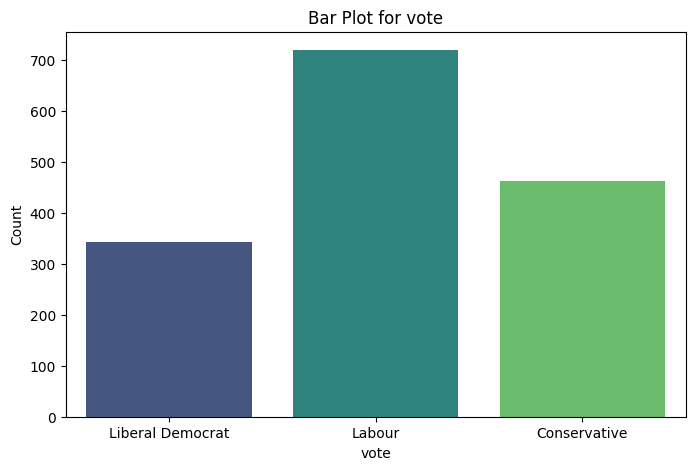

In [25]:
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Bar Plot for {col}')
    plt.ylabel('Count')
    plt.show()


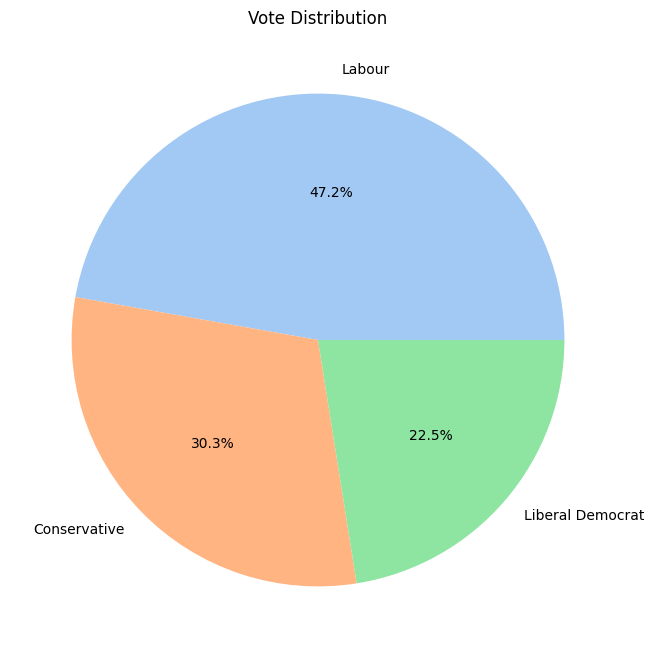

In [26]:
vote_counts = data['vote'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Vote Distribution')
plt.show()


Bivariate

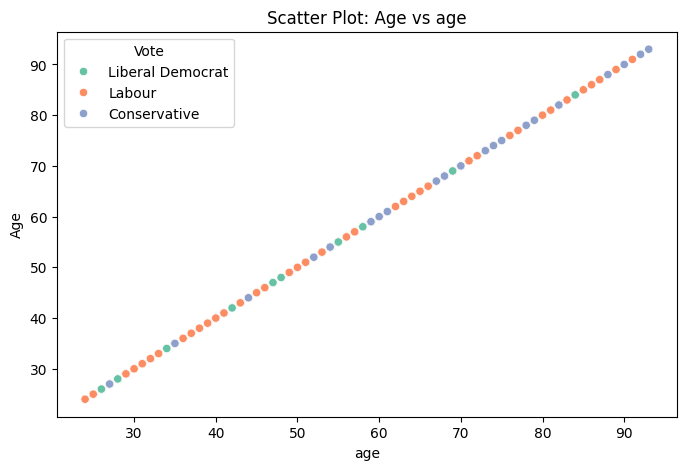

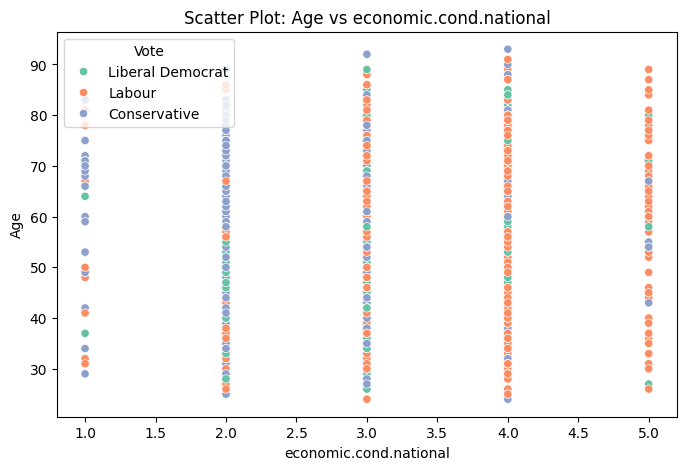

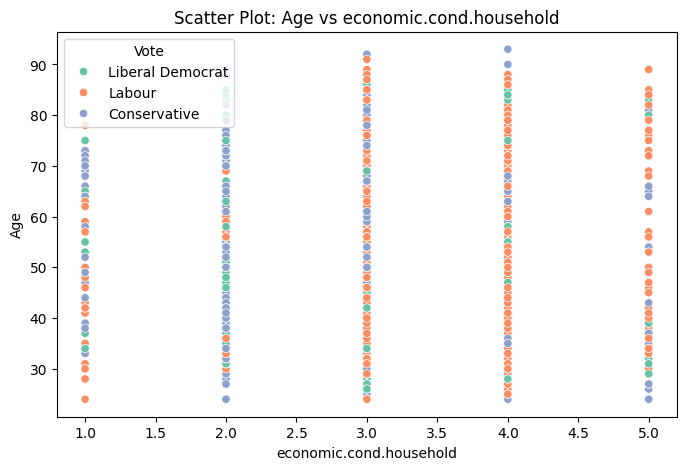

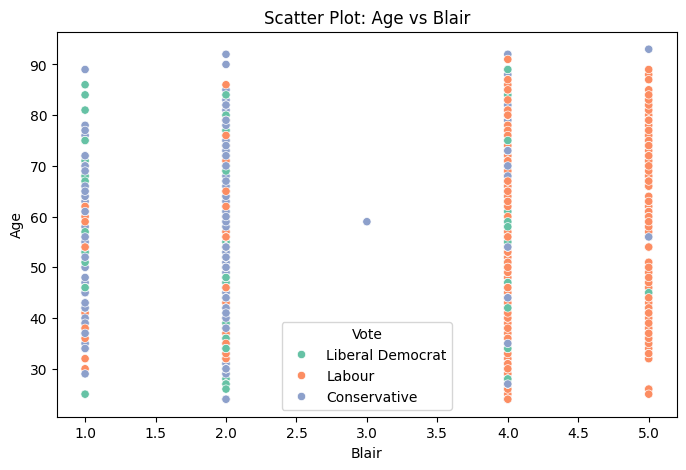

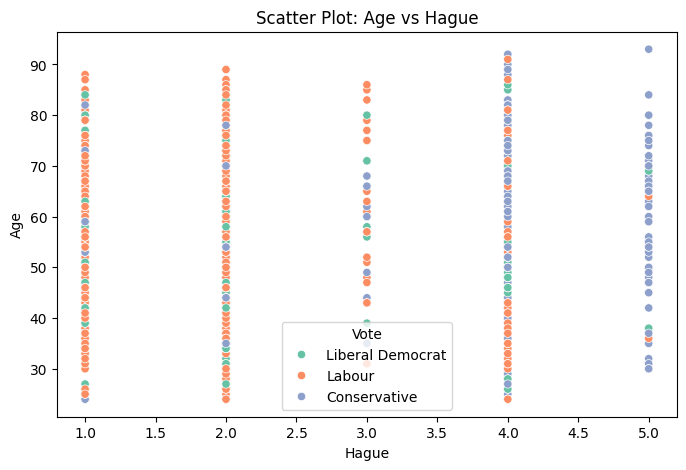

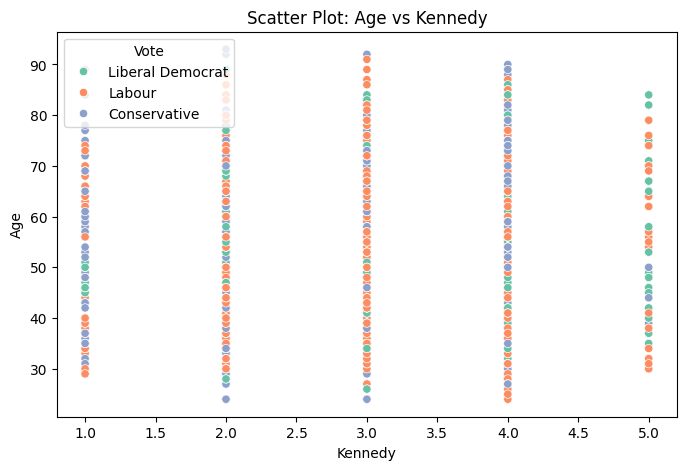

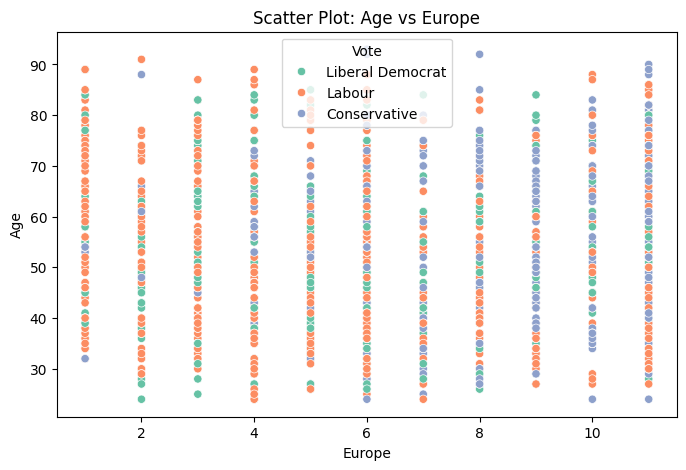

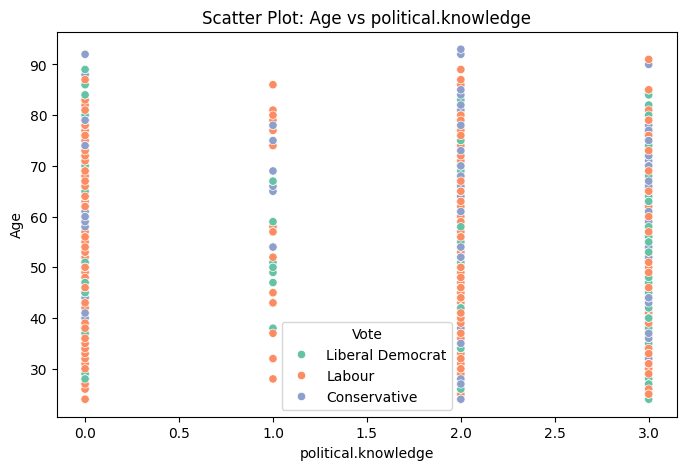

In [27]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=col, y='age', hue='vote', palette='Set2')
    plt.title(f'Scatter Plot: Age vs {col}')
    plt.xlabel(col)
    plt.ylabel('Age')
    plt.legend(title='Vote')
    plt.show()


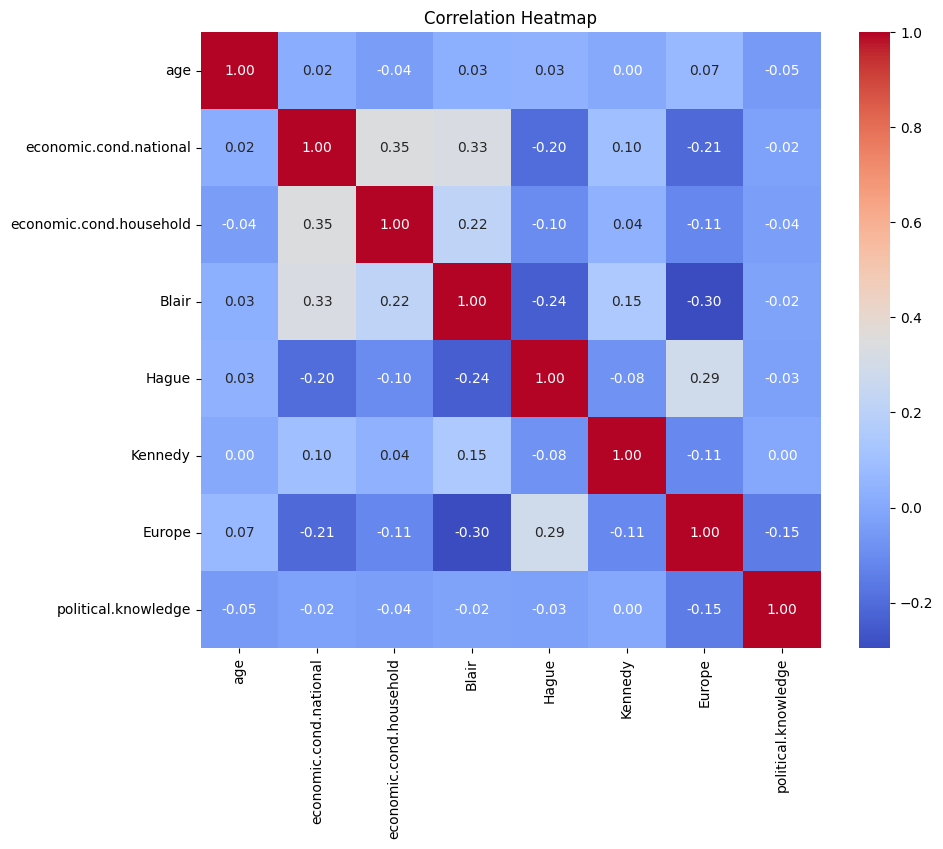

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-29-d081fe6ba465>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='vote', y='age', palette='pastel')


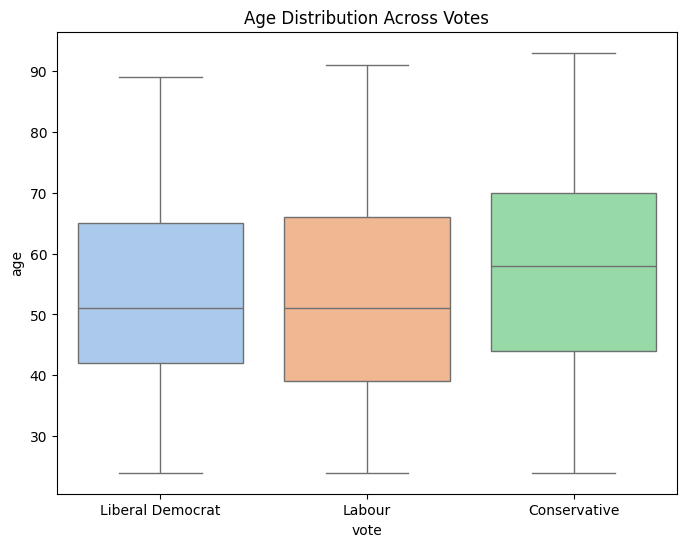

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='vote', y='age', palette='pastel')
plt.title('Age Distribution Across Votes')
plt.show()


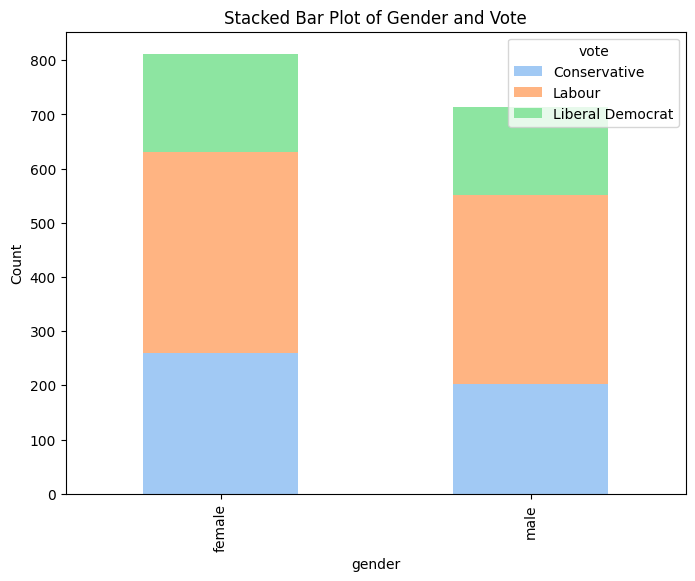

In [30]:
stacked_data = pd.crosstab(data['gender'], data['vote'])
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 6), color=sns.color_palette('pastel'))
plt.title('Stacked Bar Plot of Gender and Vote')
plt.ylabel('Count')
plt.show()


Multivariate

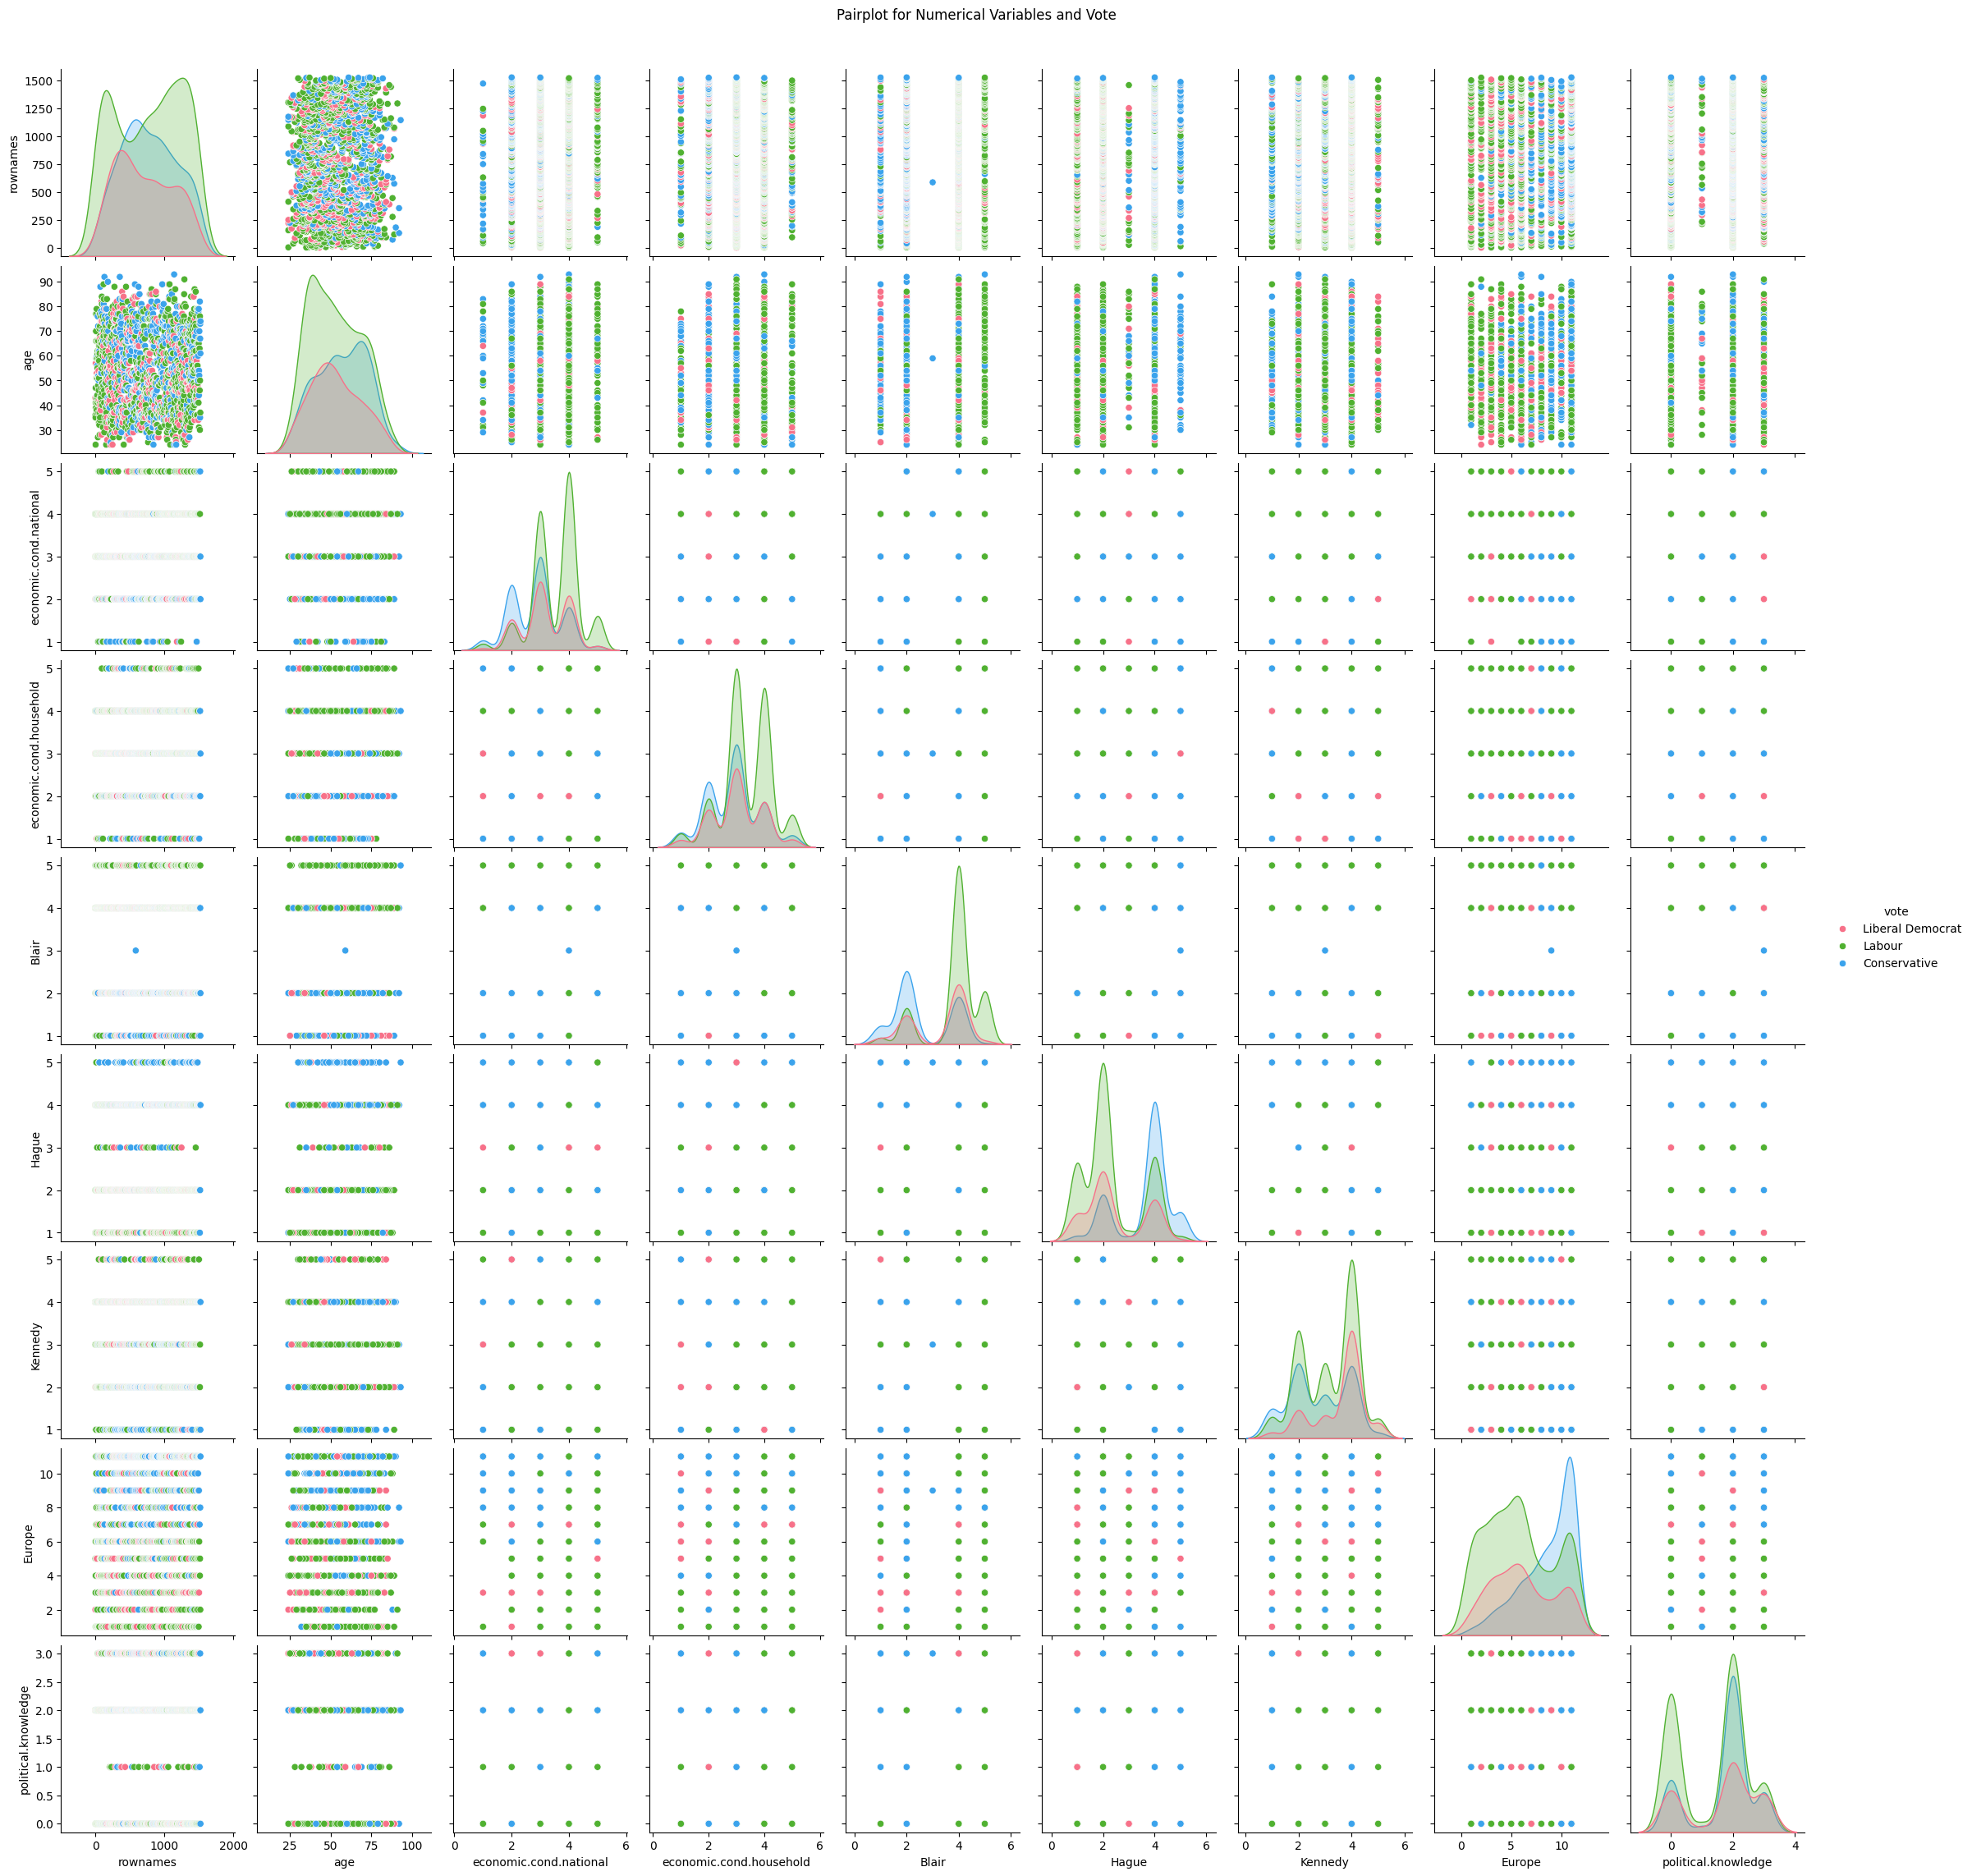

In [31]:
sns.pairplot(data, hue='vote', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot for Numerical Variables and Vote', y=1.02)
plt.show()


<ipython-input-33-876f93612583>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['age'].resample('M').mean().plot(marker='o', color='purple')


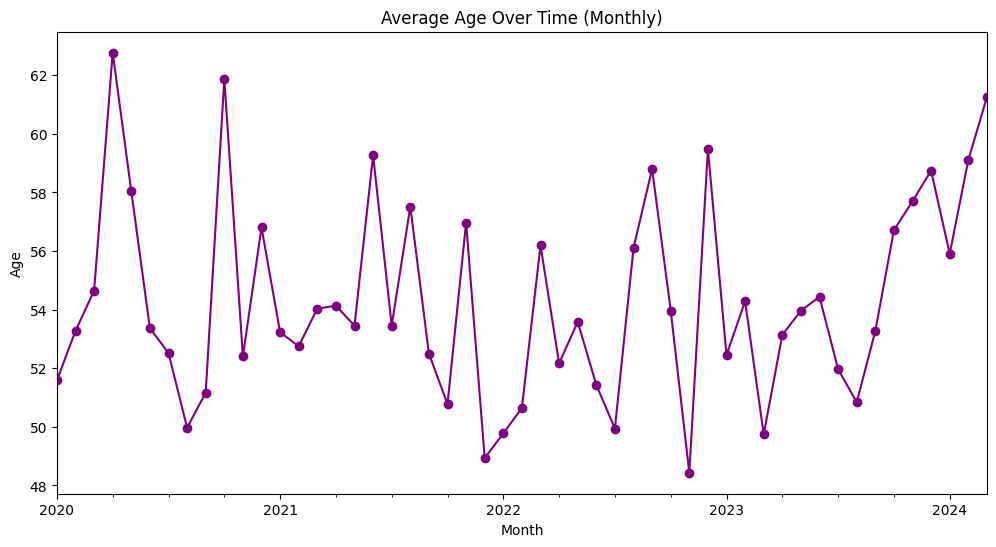

In [33]:
# Creating hypothetical time-based index for visualization
data['index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('index', inplace=True)

# Visualizing age trends over time
plt.figure(figsize=(12, 6))
data['age'].resample('M').mean().plot(marker='o', color='purple')
plt.title('Average Age Over Time (Monthly)')
plt.ylabel('Age')
plt.xlabel('Month')
plt.show()


Time series

In [ ]:
# Creating hypothetical time-based index for visualization
data['index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('index', inplace=True)

# Visualizing age trends over time
plt.figure(figsize=(12, 6))
data['age'].resample('M').mean().plot(marker='o', color='purple')
plt.title('Average Age Over Time (Monthly)')
plt.ylabel('Age')
plt.xlabel('Month')
plt.show()


# Module 4
Data Summarization and Visualization

In [35]:
data.describe()

rownames          age  economic.cond.national  \
count  1525.000000  1525.000000             1525.000000   
mean    763.000000    54.182295                3.245902   
std     440.373894    15.711209                0.880969   
min       1.000000    24.000000                1.000000   
25%     382.000000    41.000000                3.000000   
50%     763.000000    53.000000                3.000000   
75%    1144.000000    67.000000                4.000000   
max    1525.000000    93.000000                5.000000   

       economic.cond.household        Blair        Hague      Kennedy  \
count              1525.000000  1525.000000  1525.000000  1525.000000   
mean                  3.140328     3.334426     2.746885     3.135082   
std                   0.929951     1.174824     1.230703     1.081997   
min                   1.000000     1.000000     1.000000     1.000000   
25%                   3.000000     2.000000     2.000000     2.000000   
50%                   3.000000     4.000000     2.000000     3.000000   
75%                   4.000000     4.000000     4.000000     4.000000   
max                   5.000000     5.000000     5.000000     5.000000   

            Europe  political.knowledge  
count  1525.000000          1525.000000  
mean      6.728525             1.542295  
std       3.297538             1.083315  
min       1.000000             0.000000  
25%       4.000000             0.000000  
50%       6.000000             2.000000  
75%      10.000000             2.000000  
max      11.000000             3.000000

In [34]:
#1D
print("Mean Age:", data['age'].mean())
print("Median Age:", data['age'].median())
print("Standard Deviation of Age:", data['age'].std())
print("Mode of Vote:", data['vote'].mode()[0])


Mean Age: 54.18229508196721
Median Age: 53.0
Standard Deviation of Age: 15.711208571641977
Mode of Vote: Labour


                         age  political.knowledge
age                  1.00000             -0.04849
political.knowledge -0.04849              1.00000


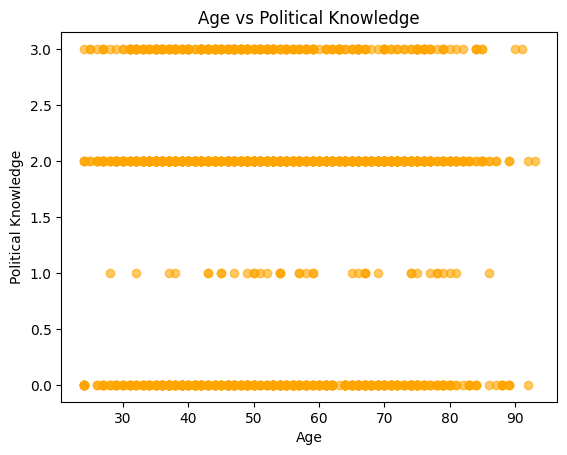

In [ ]:
correlation = data[['age', 'political.knowledge']].corr()
print(correlation)
plt.scatter(data['age'], data['political.knowledge'], alpha=0.6, color='orange')
plt.title('Age vs Political Knowledge')
plt.xlabel('Age')
plt.ylabel('Political Knowledge')
plt.show()

gender            female  male
vote                          
Conservative         259   203
Labour               372   348
Liberal Democrat     181   162


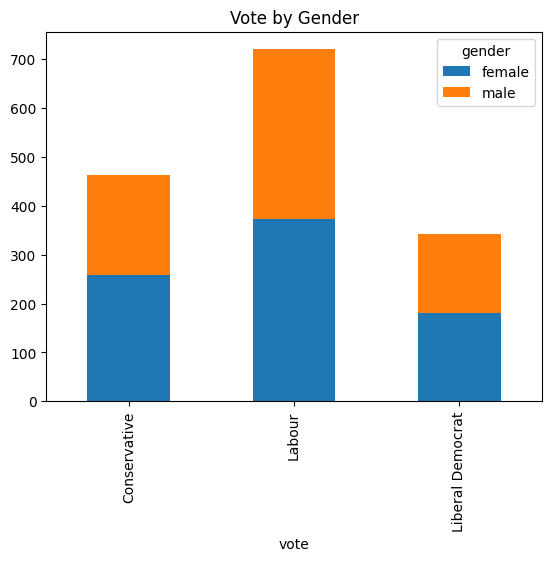

In [ ]:
contingency_table = pd.crosstab(data['vote'], data['gender'])
print(contingency_table)
contingency_table.plot(kind='bar', stacked=True)
plt.title('Vote by Gender')
plt.show()


In [ ]:
data_mapped =data
data_mapped['gender'].map({'male': 0, 'female': 1})

0       1
1       0
2       0
3       1
4       0
       ..
1520    0
1521    0
1522    0
1523    0
1524    1
Name: gender, Length: 1525, dtype: int64

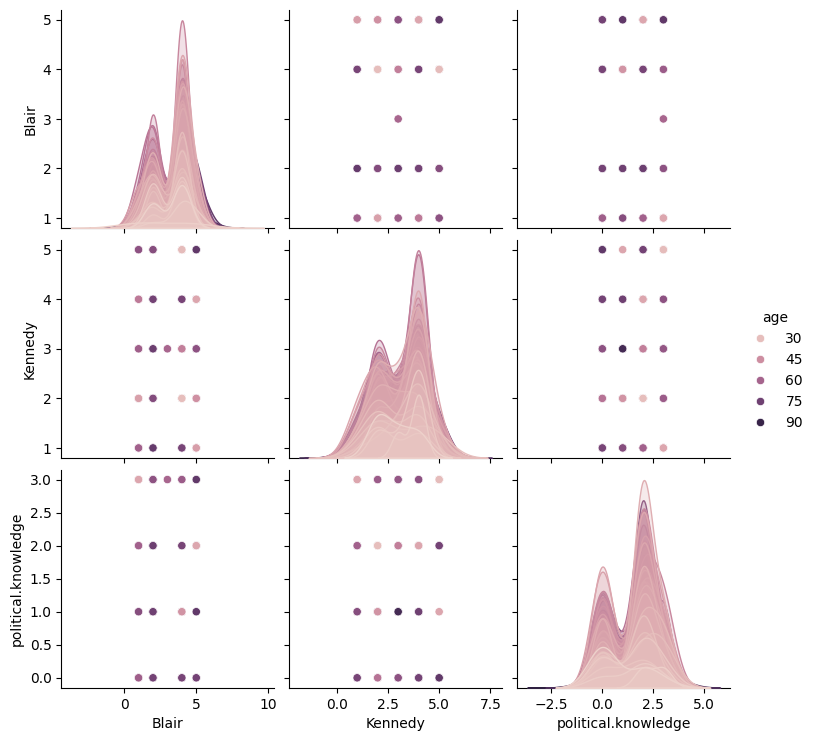

In [ ]:
sns.pairplot(data[['age', 'Blair', 'Kennedy', 'political.knowledge']], hue='age')
plt.show()

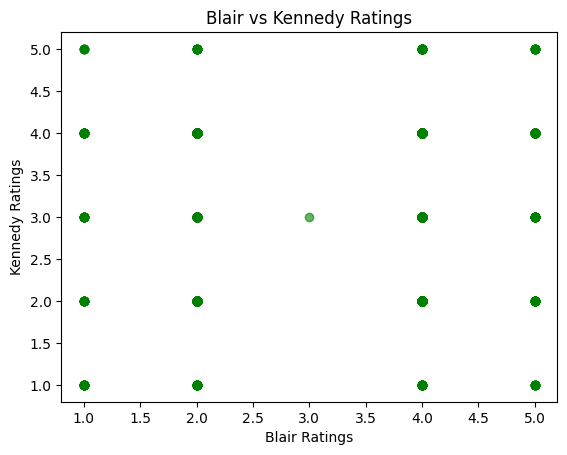

<ipython-input-88-9067036742f5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vote', data=data, palette='viridis')


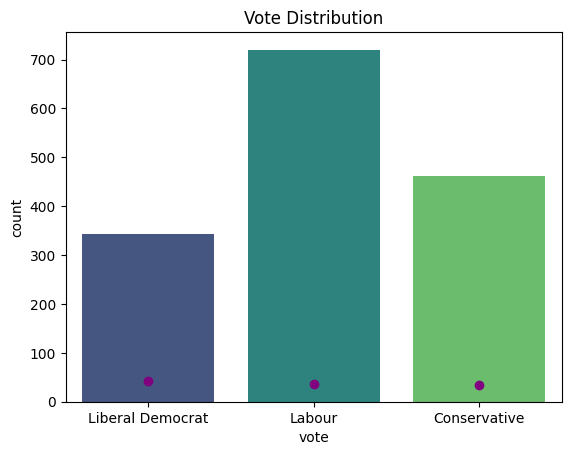

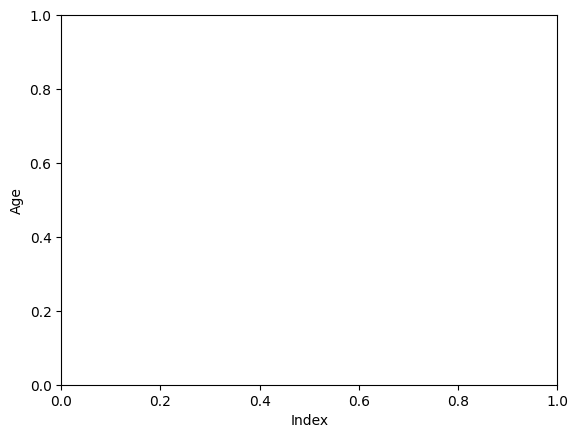

In [ ]:
plt.scatter(data['Blair'], data['Kennedy'], alpha=0.6, color='green')
plt.title('Blair vs Kennedy Ratings')
plt.xlabel('Blair Ratings')
plt.ylabel('Kennedy Ratings')
plt.show()
plt.plot(data.index, data['age'], 'o', color='purple')
plt.title('Dot Chart for Age')
sns.countplot(x='vote', data=data, palette='viridis')
plt.title('Vote Distribution')
plt.show()



# Module 5
Clustering Algorithms

In [46]:
# Select relevant columns for clustering
clustering_features = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_clustering = data[clustering_features]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


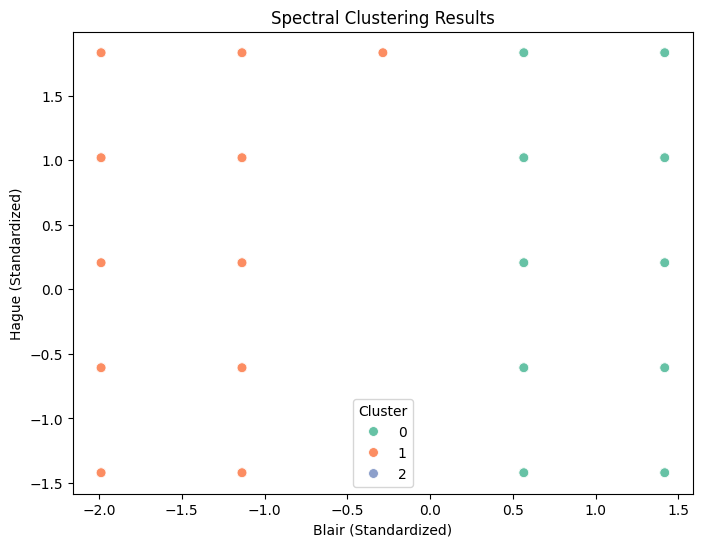

In [47]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=spectral_labels,
    palette='Set2',
    s=50
)
plt.title('Spectral Clustering Results')
plt.xlabel('Blair (Standardized)')
plt.ylabel('Hague (Standardized)')
plt.legend(title='Cluster')
plt.show()


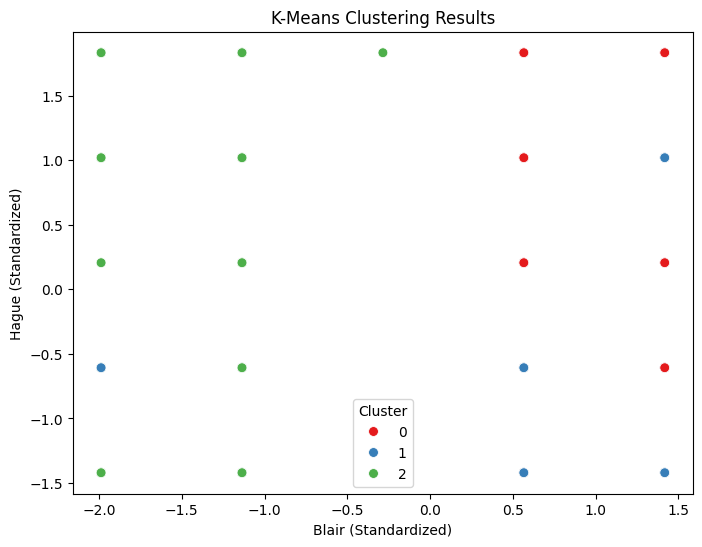

In [48]:
from sklearn.cluster import KMeans

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=kmeans_labels,
    palette='Set1',
    s=50
)
plt.title('K-Means Clustering Results')
plt.xlabel('Blair (Standardized)')
plt.ylabel('Hague (Standardized)')
plt.legend(title='Cluster')
plt.show()


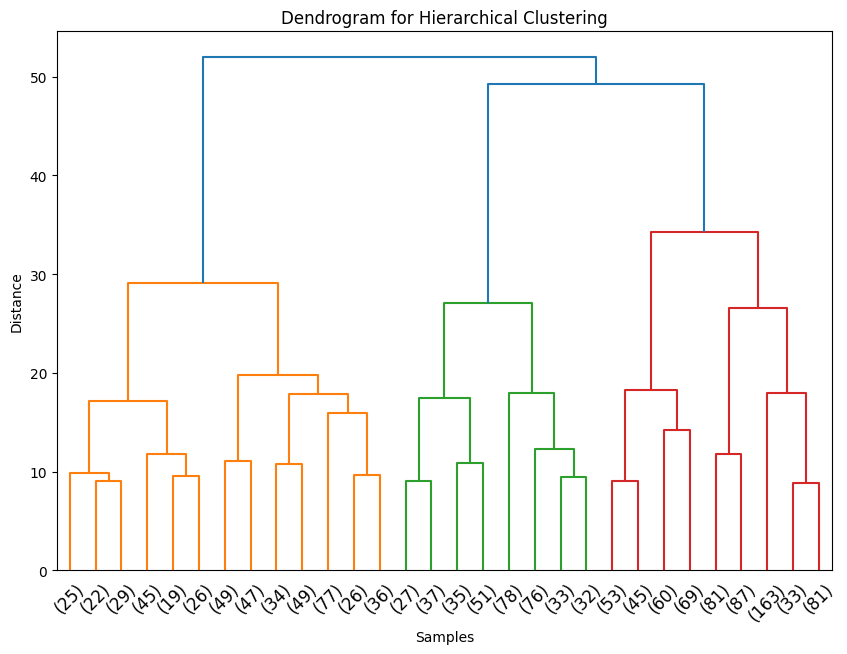

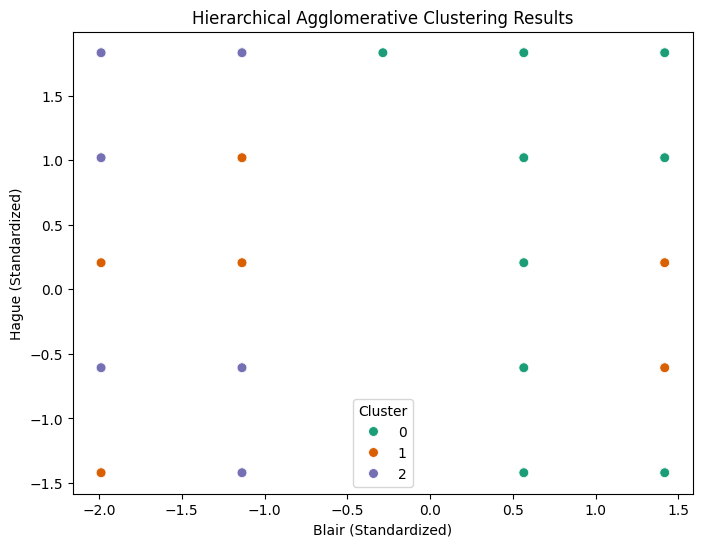

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=12)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(data_scaled)

# Visualize the clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=agg_labels,
    palette='Dark2',
    s=50
)
plt.title('Hierarchical Agglomerative Clustering Results')
plt.xlabel('Blair (Standardized)')
plt.ylabel('Hague (Standardized)')
plt.legend(title='Cluster')
plt.show()


# Module 6


In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numerical columns and target
numerical_columns = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_numerical = data[numerical_columns]

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Check for NaN in vote column and handle them
data['vote'] = data['vote'].fillna('Unknown')  # Replace NaN with 'Unknown'

# Ensure no missing values exist
assert data['vote'].isna().sum() == 0, "There are still NaN values in the 'vote' column"


In [62]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['vote'] = data['vote'].values


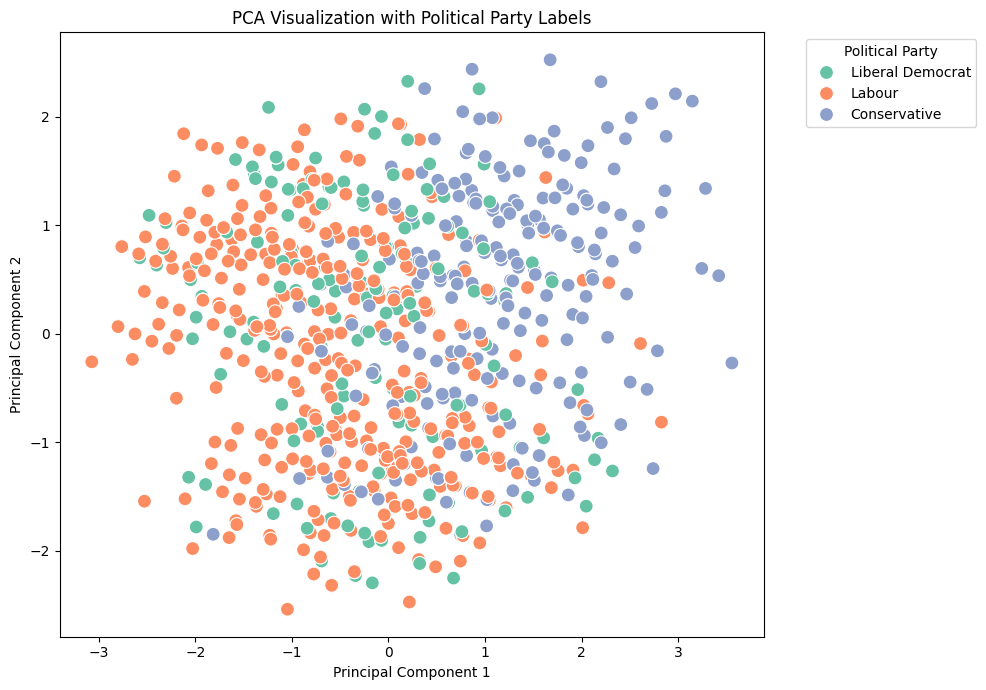

In [63]:
# Plot PCA Results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='vote',
    data=pca_df,
    palette='Set2',
    s=100
)

plt.title('PCA Visualization with Political Party Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [64]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(f"PCA1: {explained_variance[0]:.2f}, PCA2: {explained_variance[1]:.2f}")


Explained Variance Ratio:
PCA1: 0.33, PCA2: 0.21


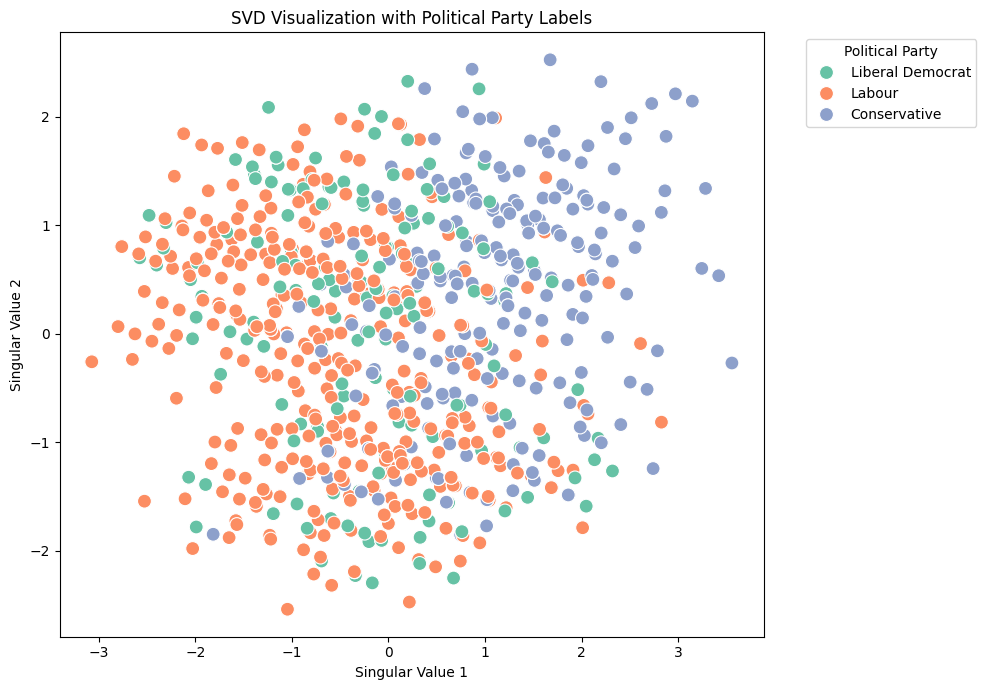

Explained Variance Ratio:
SVD1: 0.33, SVD2: 0.21


In [65]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(data_scaled)


svd_df = pd.DataFrame(data=svd_result, columns=['SVD1', 'SVD2'])
svd_df['vote'] = data['vote'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='SVD1',
    y='SVD2',
    hue='vote',
    data=svd_df,
    palette='Set2',
    s=100
)

plt.title('SVD Visualization with Political Party Labels')
plt.xlabel('Singular Value 1')
plt.ylabel('Singular Value 2')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Explained variance ratio
explained_variance = svd.explained_variance_ratio_
print("Explained Variance Ratio:")
print(f"SVD1: {explained_variance[0]:.2f}, SVD2: {explained_variance[1]:.2f}")


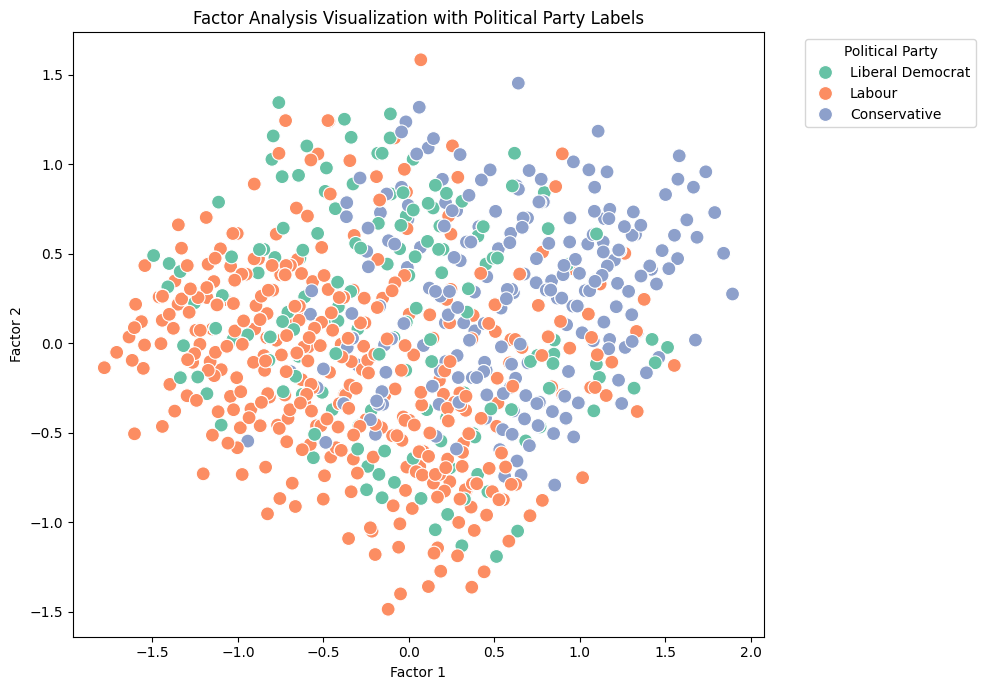

In [66]:
from sklearn.decomposition import FactorAnalysis

# Apply Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
factor_result = factor_analysis.fit_transform(data_scaled)

# Create DataFrame for Factor Analysis results
factor_df = pd.DataFrame(data=factor_result, columns=['Factor1', 'Factor2'])
factor_df['vote'] = data['vote'].values

# Plot Factor Analysis results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Factor1',
    y='Factor2',
    hue='vote',
    data=factor_df,
    palette='Set2',
    s=100
)

plt.title('Factor Analysis Visualization with Political Party Labels')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.legend(title='Political Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8bfb5c932c6d4d843de95e82bdd7749b5eb6f921668e9e4f474d66aab3232f39
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


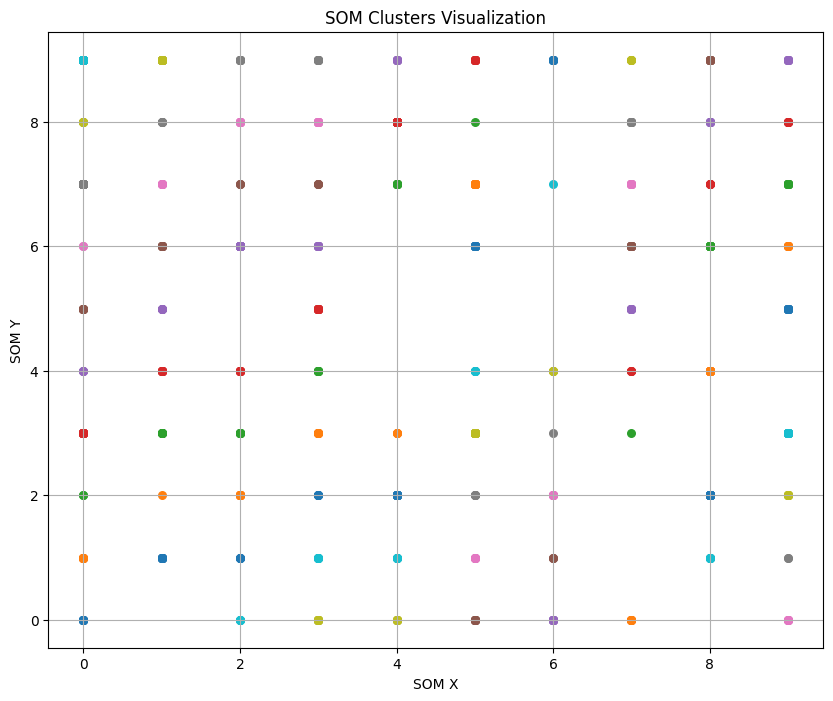

In [ ]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_numerical = data[numerical_columns]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)


som_size = 10
som = MiniSom(x=som_size, y=som_size, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(data_scaled)
som.train_random(data_scaled, 100)

win_map = som.win_map(data_scaled)


for x in range(som_size):
    for y in range(som_size):

        points = win_map.get((x, y), [])
        if points:
            plt.scatter([x] * len(points), [y] * len(points), label=f'Cluster ({x}, {y})', s=30)

plt.title('SOM Clusters Visualization')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(True)
plt.show()


# Module 7


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

numerical_columns = ['Blair', 'Hague', 'Kennedy', 'Europe', 'political.knowledge']
data_numerical = data[numerical_columns]
target = data['vote'].apply(lambda x: 1 if x == 'Labour' else 0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_numerical)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.19818248425157556
R-squared: 0.20190798279208566


In [ ]:
import random
# Reingofrcement learning

grid = np.array([
    [0, 0, 0, -1, 0],
    [0, -1, 0, -1, 0],
    [0, 0, 0, -1, 0],
    [0, 0, -1, -1, 0],
    [0, 0, 0, 0, 1]
])


q_table = np.zeros((5, 5, 4))
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.2
episodes = 1000

def valid_move(x, y):
    return 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1] and grid[x, y] != -1
for episode in range(episodes):
    x, y = 0, 0
    while (x, y) != (4, 4):  # Goal is at (4, 4)
        if random.uniform(0, 1) < epsilon:
            action = random.choice(range(4))
        else:
            action = np.argmax(q_table[x, y])
        dx, dy = actions[action]
        new_x, new_y = x + dx, y + dy
        if valid_move(new_x, new_y):
            reward = 1 if (new_x, new_y) == (4, 4) else 0
            q_table[x, y, action] = q_table[x, y, action] + learning_rate * (reward + discount_factor * np.max(q_table[new_x, new_y]) - q_table[x, y, action])
            x, y = new_x, new_y

print("Q-table after training:")
print(q_table)

x, y = 0, 0
path = [(x, y)]
while (x, y) != (4, 4):
    action = np.argmax(q_table[x, y])
    dx, dy = actions[action]
    x, y = x + dx, y + dy
    path.append((x, y))

print("Path to goal:", path)


Q-table after training:
[[[0.         0.4782969  0.         0.38742049]
  [0.         0.         0.30422992 0.43046721]
  [0.         0.4782969  0.35650112 0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.3861379  0.531441   0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.40005105 0.531441   0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.46628164 0.46204922 0.         0.59049   ]
  [0.         0.6561     0.53015647 0.53000294]
  [0.46398261 0.         0.59049    0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.53144085 0.2388758  0.         0.3422894 ]
  [0.58990612 0.729      0.47768588 0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]]

 [[0.476